### Student Performance Indicator 
What is the Life Cycle of a Machine Learning Project ? 
- Understanding the Problem Statement 
- Data Collection 
- Perform Data Checks 
- EDA 
- Data Pre-processing 
- Model Training 
- Choosing the model with the best accuracy 

What is the Problem Statement ? 
* The project aims to explain how various variables such as 
    - Gender 
    - Ethnicity 
    - Parental Level of Education 
    - Lunch 
    - Test Preparation Course 

    affects a student's performance (measured by his/her test scores)

Where is the Data being collected from ? 
* Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### Importing Data and the Packages required 

In [5]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("data/stud.csv")
print(df.shape)
display(df.head())
df.info()

(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Information about the Data 
* gender : male/female 
* race_ethncity : Groups (A,B,C,D,E)
* parental_level_of_education : bachelor's degree, some college, master's degree, associate's degree, high school
* lunch : standard or free/reduced
* test_preparation_course : complete or not complete before test 
* math_score, reading_score, writing_score : Scores for respective subjects

What Data checks need to be performed ? 
* missing values 
* duplicates 
* data type
* number of unique values in each column 
* statistics of the data set 
* various categories present in different categorical columns 

#### Checking for Missing Values 

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

As can be seen , there are no missing values in this dataset 

#### Check for Duplicates 

In [10]:
df.duplicated().sum()

0

There are no duplicate values in this dataset

#### Check for Data Types 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Apart from scoring columns (int datatype) , every other feature is of the object datatype .

#### Check for number of unique values in each column 

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics for numerical features

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations drawn : 
* The mean and std values are (almost) at par for all three features 
* The minimum for math is 0 , while for reading and writing , they are 17 and 10 respectively

#### Exploring Data

In [14]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [17]:
print("Unique values in every categorical features : ")
print("Gender :")
print(df['gender'].unique())
print()
print("Race/Ethncity Group :")
print(df['race_ethnicity'].unique())
print()
print("Parental Level of Education :")
print(df['parental_level_of_education'].unique())
print()
print("Lunch :")
print(df['lunch'].unique())
print()
print("Test Preparation Course :")
print(df['test_preparation_course'].unique())

Unique values in every categorical features : 
Gender :
['female' 'male']

Race/Ethncity Group :
['group B' 'group C' 'group A' 'group D' 'group E']

Parental Level of Education :
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch :
['standard' 'free/reduced']

Test Preparation Course :
['none' 'completed']


In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Numerical Columns :")
print(numeric_features)
print()
print("Categorical Columns :")
print(categorical_features)

Numerical Columns :
['math_score', 'reading_score', 'writing_score']

Categorical Columns :
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding Columns for total_score and average

In [19]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total_score'] / 3 , 2)
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67


In [24]:
df[df['math_score'] == 100]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.67
451,female,group E,some college,standard,none,100,92,97,289,96.33
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00
623,male,group A,some college,standard,completed,100,96,86,282,94.00
625,male,group D,some college,standard,completed,100,97,99,296,98.67
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00


Number of students who secured 100 marks in a subject

In [31]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
print(f"Reading : {reading_full}")
print(f"Writing : {writing_full}")
print(f"Math : {math_full}")


Reading : 17
Writing : 14
Math : 7


Number of students with less than 20 marks 

In [32]:
reading_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()
print(f"Reading : {reading_less}")
print(f"Writing : {writing_less}")
print(f"Math : {math_less}")


Reading : 1
Writing : 3
Math : 4


Observations : 
* Students performed worst in Maths and best in Reading 

#### Visualising Data 
Visualise average score distribution using a 
* Histogram
* KDE 

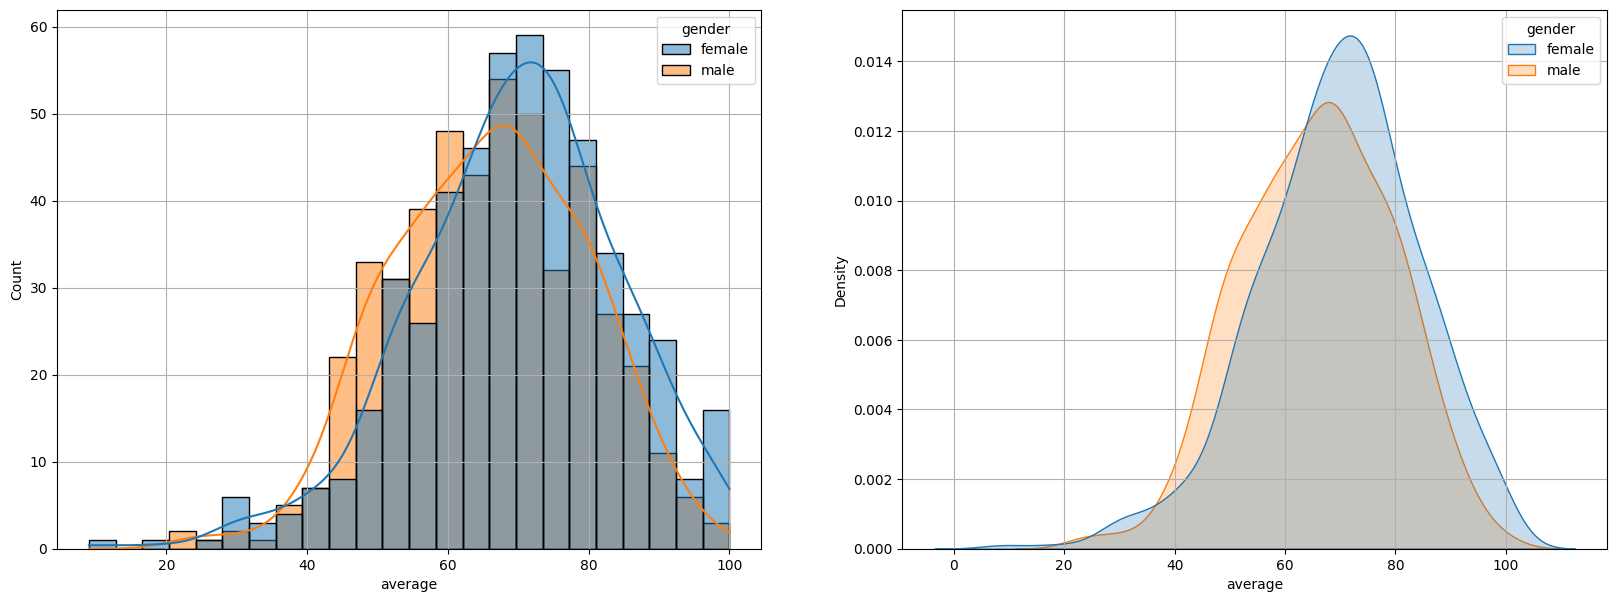

In [41]:
fig, ax = plt.subplots(1, 2, figsize=[20, 7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', hue='gender', kde=True)
plt.grid()
plt.subplot(1,2,2)
plt.grid()
sns.kdeplot(data=df, x='average', fill=True, hue='gender');

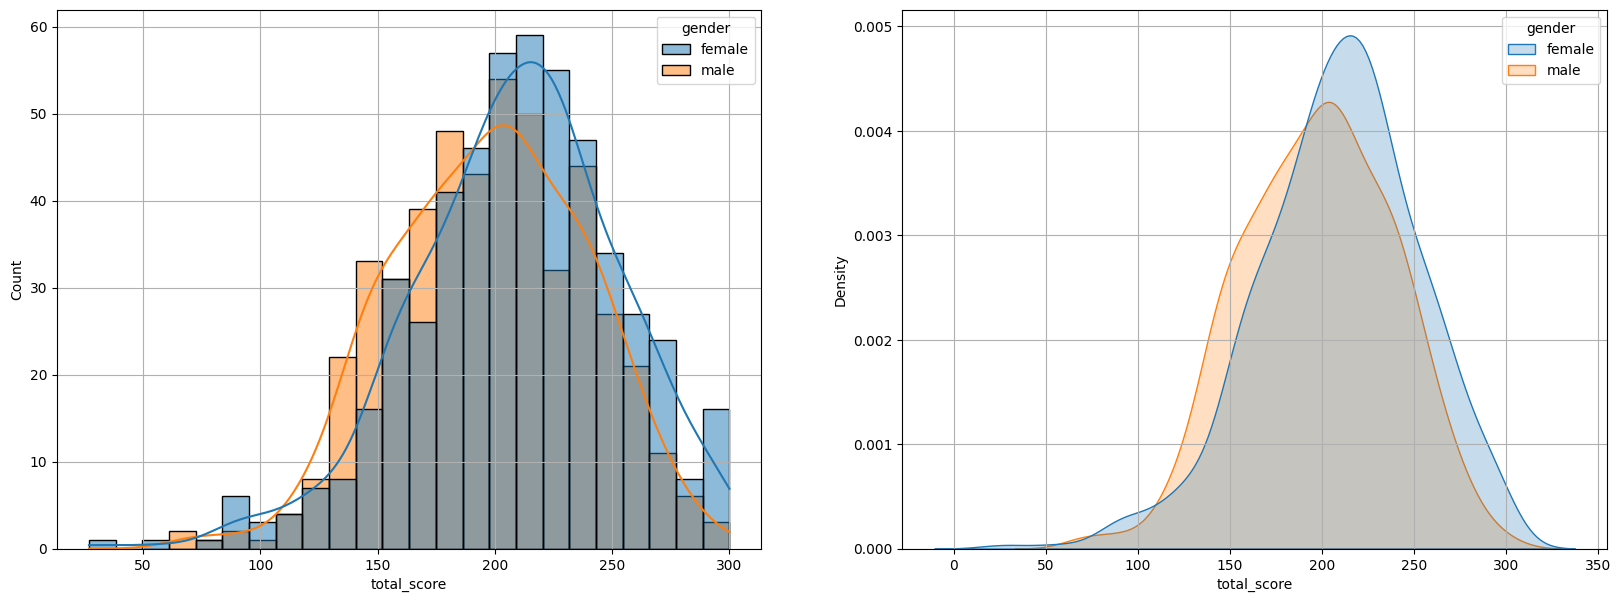

In [42]:
fig, ax = plt.subplots(1, 2, figsize=[20, 7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score', hue='gender', kde=True)
plt.grid()
plt.subplot(1,2,2)
plt.grid()
sns.kdeplot(data=df, x='total_score', fill=True, hue='gender');

Conclusion 
* Female students tend to perform well than male students

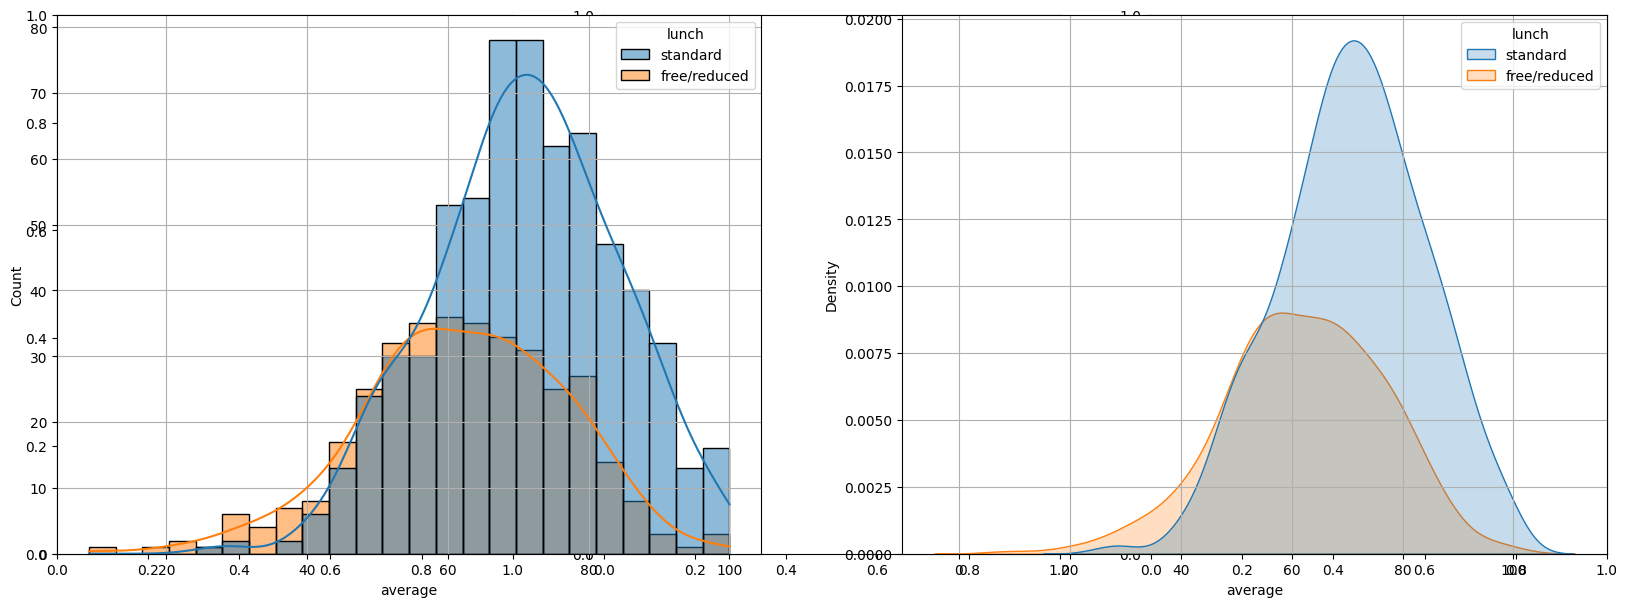

In [44]:
fig, ax = plt.subplots(1, 3, figsize=[20, 7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', hue='lunch', kde=True)
plt.grid()
plt.subplot(1,2,2)
plt.grid()
sns.kdeplot(data=df, x='average', fill=True, hue='lunch');

Conclusion : 
* Standard Lunch did help in better performance .

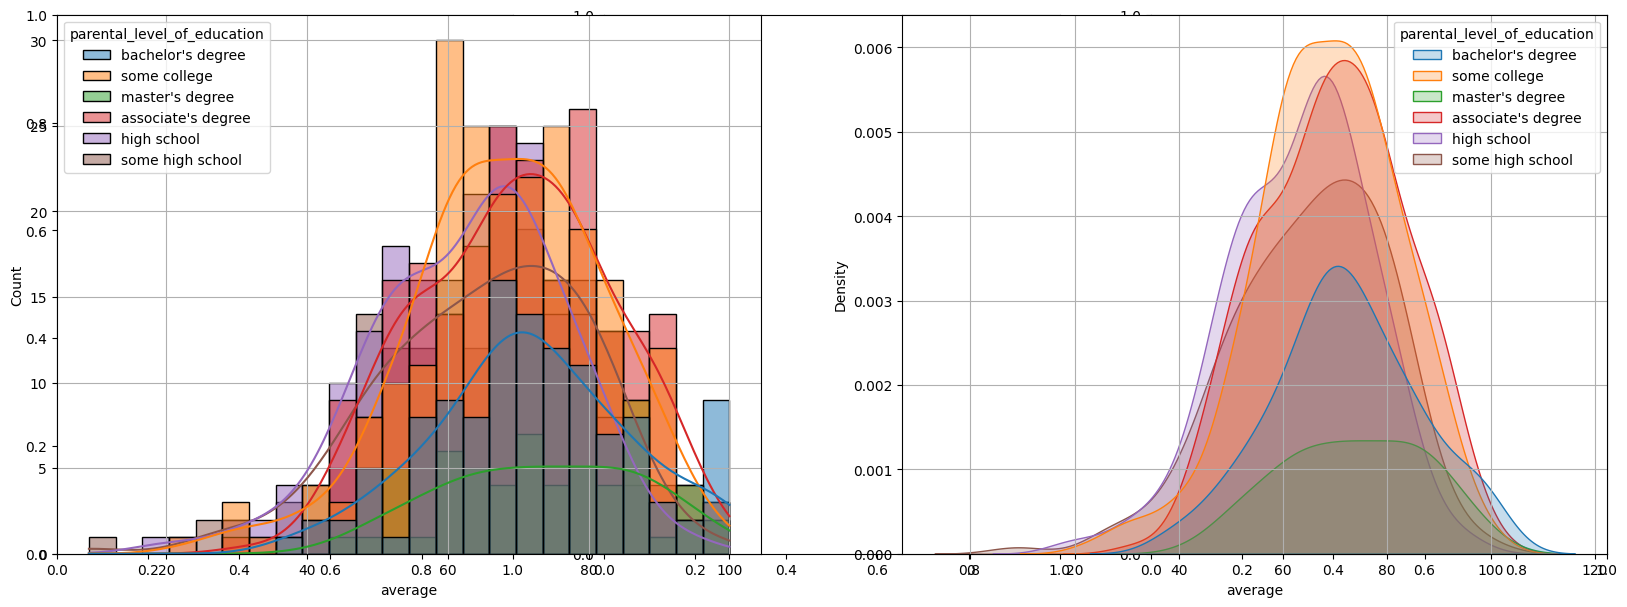

In [45]:
fig, ax = plt.subplots(1, 3, figsize=[20, 7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', hue='parental_level_of_education', kde=True)
plt.grid()
plt.subplot(1,2,2)
plt.grid()
sns.kdeplot(data=df, x='average', fill=True, hue='parental_level_of_education');

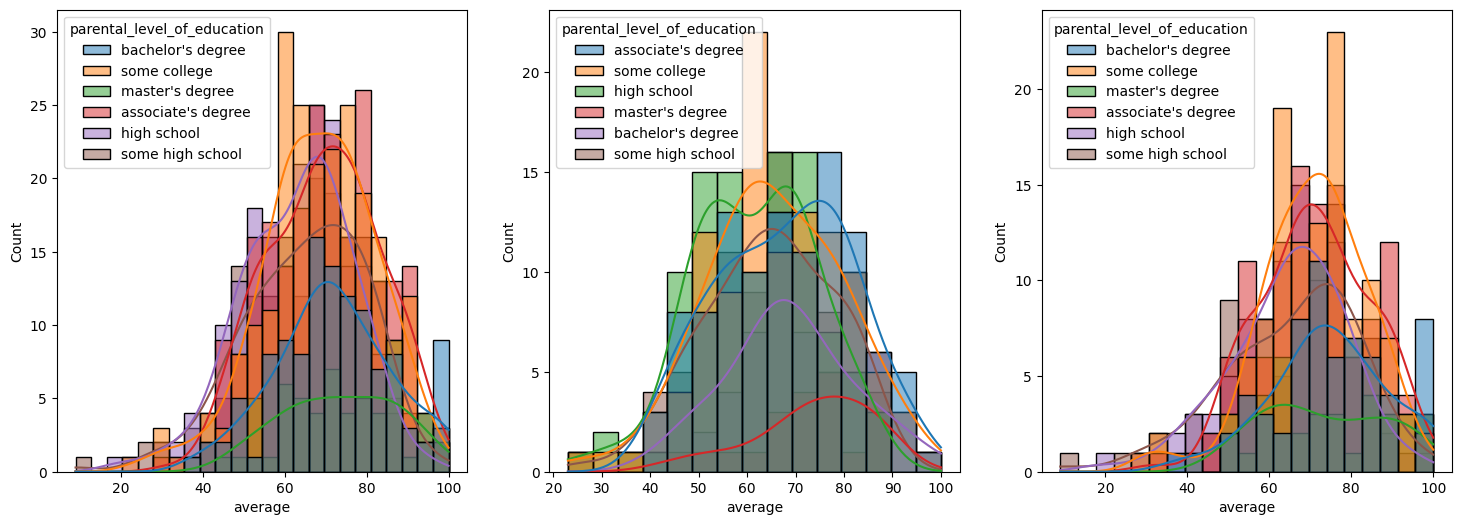

In [49]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

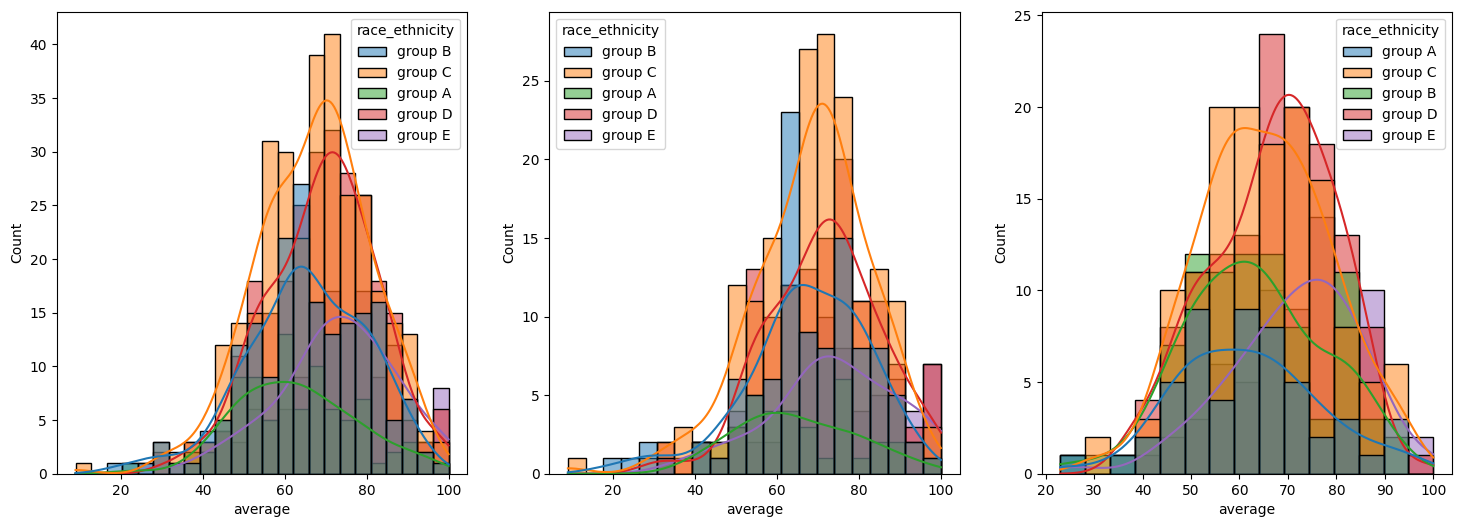

In [52]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

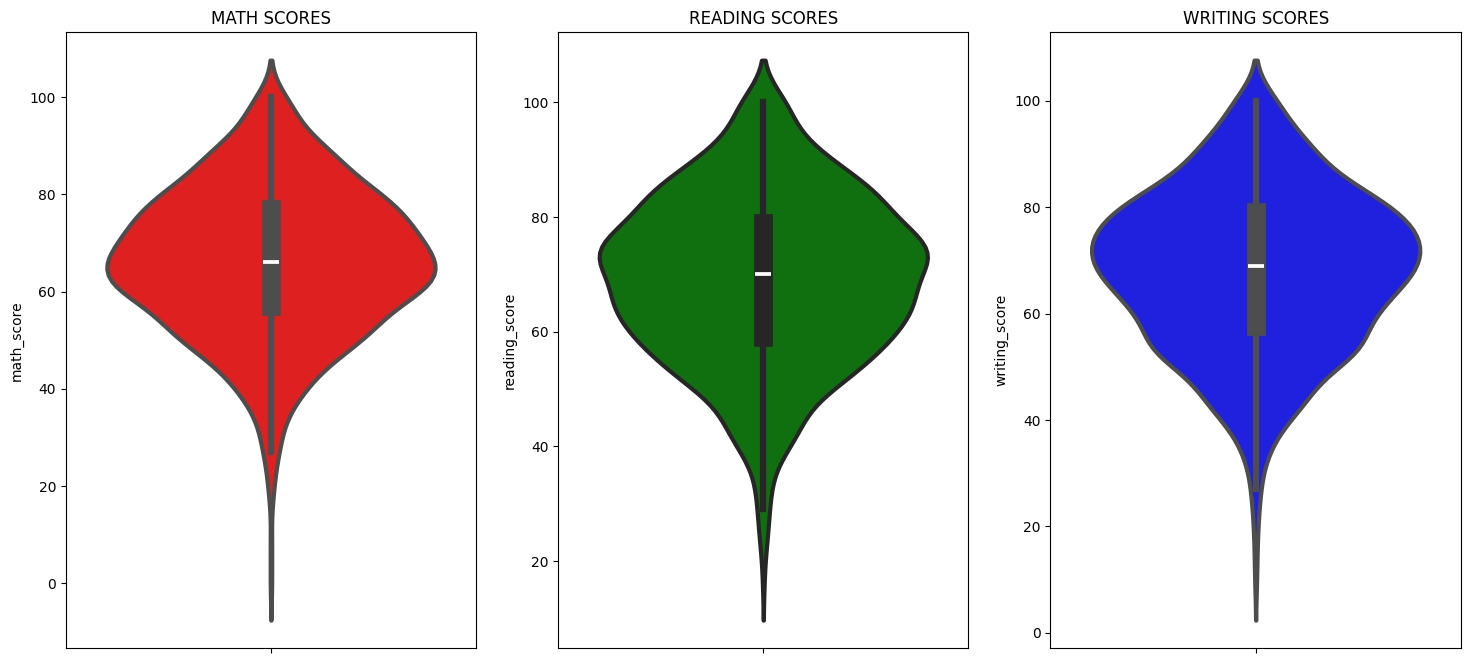

In [54]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

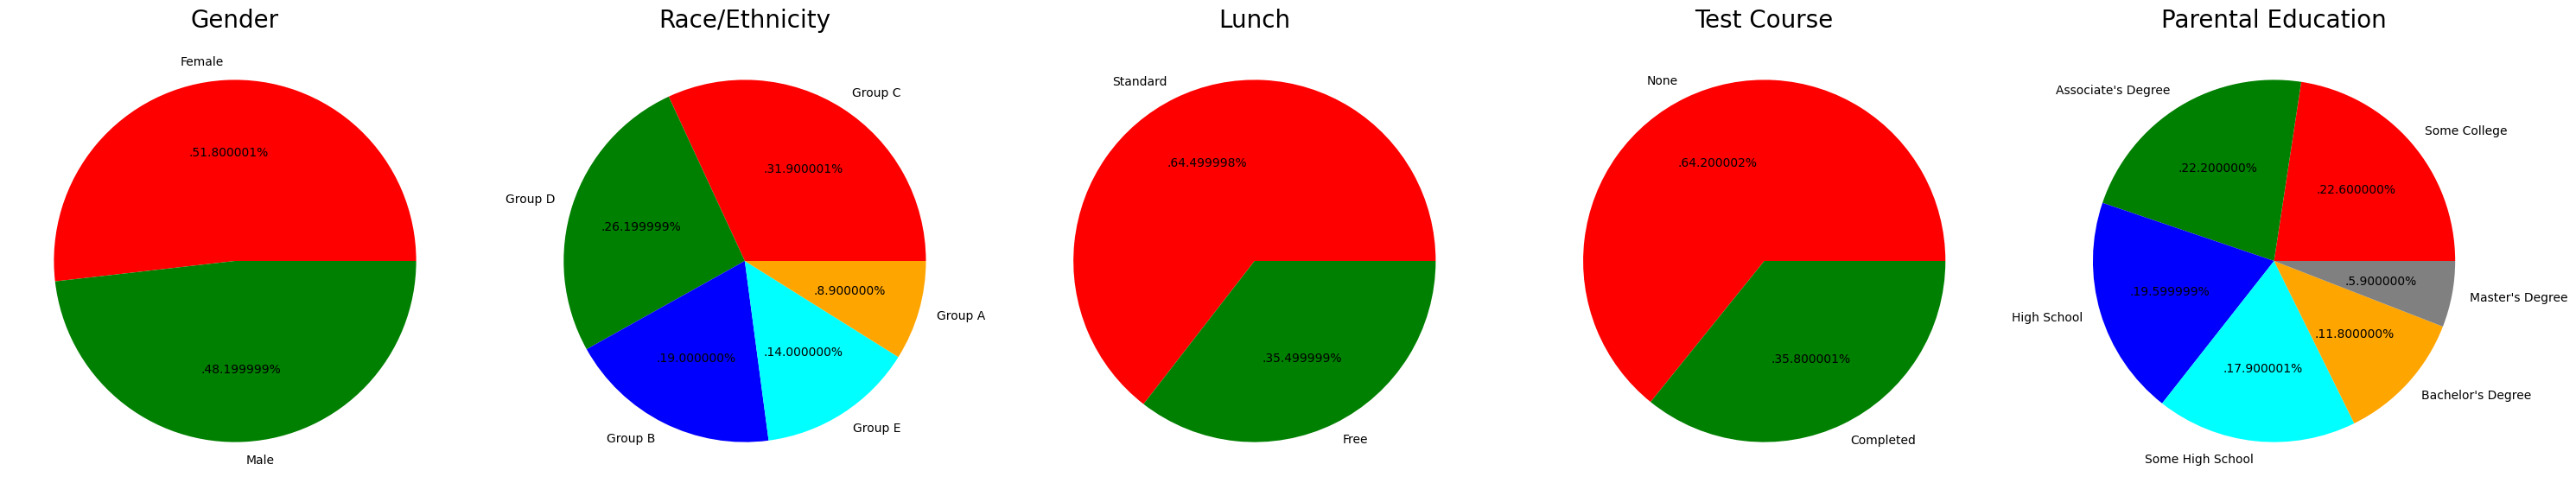

In [56]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# TO BE COMPLETED